# Post request 

Import requests, io, pandas and matplotlib

In [1]:
import requests
import io
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://api.nsd.no/dbhapitjener/Tabeller/hentCSVTabellData"

query = {"tabell_id":123,"api_versjon":1,"statuslinje":"N","kodetekst":"J","desimal_separator":".",
"groupBy":[ "Årstall",  "Prosent egenfinansiering"],
"sortBy":["Årstall"],
"filter":[
   {
      "variabel": "Semester",
      "selection": {
         "filter": "item",
         "values": [
            "3"
         ],
         "exclude": [
            ""
         ]
      }
   },
   {
      "variabel": "Nivåkode",
      "selection": {
         "filter": "all",
         "values": [
            "*"
         ],
         "exclude": [
            "FU", "VS"
         ]
      }
   },
   {
      "variabel": "Årstall",
      "selection": {
         "filter": "top",
         "values": [
            "10"
         ],
         "exclude": [
            ""
         ]
      } },
      {
      "variabel": "Studentkategori",
      "selection": {
         "filter": "item",
         "values": [
            "S","A"
         ],
         "exclude": [
            ""
         ]
      }
   }
]} 
res = requests.post(url, json = query)
content = res.content
df = pd.read_csv(io.StringIO(content.decode('utf-8')), sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 5 columns):
Årstall                     523 non-null int64
Prosent egenfinansiering    523 non-null float64
Antall totalt               523 non-null int64
Antall kvinner              523 non-null int64
Antall menn                 523 non-null int64
dtypes: float64(1), int64(4)
memory usage: 20.6 KB


In [4]:
df.shape

(523, 5)

In [5]:
df.head()

,Årstall,Prosent egenfinansiering,Antall totalt,Antall kvinner,Antall menn
0,2010,0.0,8677,5997,2680
1,2010,3.0,44,37,7
2,2010,9.0,118,92,26
3,2010,10.0,197,106,91
4,2010,13.0,21,0,0


Defining two new columns

In [6]:
 df['Kvinner'] = df['Antall kvinner']*df['Prosent egenfinansiering']/100
df['Menn'] = df['Antall menn']*df['Prosent egenfinansiering']/100

Group data by year and agregate by gender

In [7]:
df = df.groupby(['Årstall'])['Kvinner','Menn'].sum().reset_index()

Plot line diagram 

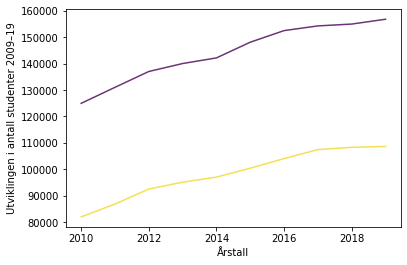

In [8]:
plt.plot(df['Årstall'].tolist(), df['Kvinner'].tolist(), color = "#6c3376")


plt.plot(df['Årstall'].tolist(), df['Menn'].tolist(),  color = "#f3e151")

plt.xlabel('Årstall')  
plt.ylabel('Utviklingen i antall studenter 2009–19')

plt.show()